# Project: Investigate The Movie Database (TMDb) Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The author has always been interested in movies and this dataset seems ideal opportunity to combine my love for Movies and Data Analytics.

> **Questions to Answer:** 
- Which are the top grossing movies and do higher budgets result in higher revenue for the movies? 
- Do movies with more vote counts recieve higher ratings? 
- How do the Popularity and Ratings(Average Vote) of Hit Movies compare to that of Flop Movies over the years?
- Which genres have become most recurrent over the years?

In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Read csv file and load data
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### General Observations:

- The above info shows that there are a few columns that have null values
- All the numeric columns have either **int** or **float** datatypes
- The release_date column is a string and needs to be converted to **Datetime** format

In [4]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Observations:
- Most of the movies have a runtime between 90 to 120 minutes.
- Most of the movies are rated between 5 and 7

### Data Cleaning

- **Removal of unnecessary columns:** Some of the columns such as ***id, imdb_id, homepage, tagline, keywords*** are not necessary for analysis and thus can be dropped
- **Removal of null values:** The columns that have null values are strings and thus need to be dropped. Mean or regression cannot be applied to those columns
- **Index:** The movie title can be set as index for better understanding of the table
- **Multiple details in a column:** Columns such as ***cast, studios, genre*** have multiple names and thus need to be trimmed/cleaned

In [5]:
# Drop columns that are not to be used in the analysis from the dataset
df_movies.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
# Convert release_date to datetime format
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
type(df_movies['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
#Stop floats from displaying as scientific notations
pd.options.display.float_format = '{:20,.2f}'.format

In [8]:
# Remove null values from the dataset
df_movies.dropna(axis = 0, inplace = True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [9]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"9,773.00","9,773.00","9,773.00","9,773.00","9,773.00","9,773.00","9,773.00","9,773.00","9,773.00"
mean,0.69,"16,181,082.06","44,226,781.98",102.93,239.30,5.96,"2,000.88","19,417,073.38","57,047,354.85"
std,1.04,"32,209,392.90","122,583,404.63",27.88,602.98,0.91,13.04,"35,664,673.09","151,443,231.58"
min,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,0.23,0.00,0.00,90.00,18.00,5.40,"1,994.00",0.00,0.00
50%,0.42,"200,000.00",0.00,100.00,46.00,6.00,"2,005.00","311,425.37",0.00
75%,0.78,"19,400,000.00","31,042,035.00",112.00,173.00,6.60,"2,011.00","24,693,351.32","43,113,437.60"
max,32.99,"425,000,000.00","2,781,505,847.00",877.00,"9,767.00",8.70,"2,015.00","425,000,000.00","2,827,123,750.41"


- There are multiple 0 values in ***budget, revenue, budget_adj, revenue_adj*** columns and thus need to be dropped

In [10]:
df_movies.replace(0, np.nan, inplace = True) # Convert all 0 values to Null Values
df_movies.info()
df_movies.dropna(axis = 0, inplace = True) # Drop all null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  5022 non-null float64
revenue                 4751 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9760 non-null float64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              5022 non-null float64
revenue_adj             4751 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(5)
memory usage: 1.2+ MB


In [11]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"3,806.00","3,806.00","3,806.00","3,806.00","3,806.00","3,806.00","3,806.00","3,806.00","3,806.00"
mean,1.20,"37,605,997.61","108,945,014.06",109.35,534.05,6.17,"2,001.23","44,715,897.78","138,679,741.77"
std,1.48,"42,316,408.87","177,282,934.99",19.85,883.67,0.79,11.33,"44,881,707.24","216,980,283.37"
min,0.01,1.00,2.00,15.00,10.00,2.20,"1,960.00",0.97,2.37
25%,0.47,"10,000,000.00","14,292,622.50",96.00,74.00,5.70,"1,995.00","13,546,369.28","19,235,140.95"
50%,0.81,"25,000,000.00","46,209,036.50",106.00,208.50,6.20,"2,004.00","30,383,599.01","62,834,672.02"
75%,1.39,"50,000,000.00","126,062,462.25",119.00,584.00,6.70,"2,010.00","60,834,891.39","165,727,346.14"
max,32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41"


**Find and Remove any duplicate data in the Movies Dataset**

In [12]:
# Finding and dropping duplicate values, if any.
df_movies[df_movies.duplicated()]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.60,"30,000,000.00","967,000.00",TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92.00,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.00,2010,"30,000,000.00","967,000.00"


In [13]:
# Drop the duplicate value
df_movies.drop_duplicates(inplace = True)

Edit the ***cast, production_companies*** and ***genres*** columns from the dataset to make them ready for analysis

In [14]:
# Creating new dataframes to remove the pipe from cast and production companies.

df_c = df_movies.cast.str.split("|", expand = True).rename(columns = lambda x: f"cast_{x+1}")
df_p = df_movies.production_companies.str.split("|", expand = True).rename(columns = lambda x: f"prod_c_{x+1}")

In [15]:
# Merging the above created dataframes with the dataset

df_movies = df_movies.join([df_c, df_p])

In [16]:
# Creating a unique array of each genre in the dataset and calculating how many times each genre appears
df_genres = df_movies.genres.str.get_dummies()
df_genres.head() # Checking the dataframe created

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
# Merging the genres dataset with the original dataset
df_movies = df_movies.join(df_genres)

In [18]:
# Droppping original columns that are no longer necessary
df_movies.drop(['cast', 'genres', 'production_companies'], axis = 1, inplace = True)

In [19]:
# Checking the table with all the changes
df_movies.head()

,popularity,budget,revenue,original_title,director,runtime,release_date,vote_count,vote_average,release_year,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,32.99,"150,000,000.00","1,513,528,810.00",Jurassic World,Colin Trevorrow,124.00,2015-06-09,5562,6.50,2015,...,0,0,0,0,0,1,0,1,0,0
1,28.42,"150,000,000.00","378,436,354.00",Mad Max: Fury Road,George Miller,120.00,2015-05-13,6185,7.10,2015,...,0,0,0,0,0,1,0,1,0,0
2,13.11,"110,000,000.00","295,238,201.00",Insurgent,Robert Schwentke,119.00,2015-03-18,2480,6.30,2015,...,0,0,0,0,0,1,0,1,0,0
3,11.17,"200,000,000.00","2,068,178,225.00",Star Wars: The Force Awakens,J.J. Abrams,136.00,2015-12-15,5292,7.50,2015,...,0,0,0,0,0,1,0,0,0,0
4,9.34,"190,000,000.00","1,506,249,360.00",Furious 7,James Wan,137.00,2015-04-01,2947,7.30,2015,...,0,0,0,0,0,0,0,1,0,0


**Now we are ready for Exploratory Data Analysis as all the columns and rows have been cleaned and trimmed.**

<a id='eda'></a>
## Exploratory Data Analysis


### 1. Which are the top grossing movies and do higher budgets result in higher revenue for the movies?

In [20]:
# Sort the top 10 movies based on highest revenue
df_movies.groupby('original_title')['revenue'].sum().sort_values(ascending = False).head(10)

original_title
Avatar                                             2,781,505,847.00
Star Wars: The Force Awakens                       2,068,178,225.00
Titanic                                            1,845,034,188.00
The Avengers                                       1,568,080,742.00
Jurassic World                                     1,513,528,810.00
Furious 7                                          1,506,249,360.00
Avengers: Age of Ultron                            1,405,035,767.00
Harry Potter and the Deathly Hallows: Part 2       1,327,817,822.00
Frozen                                             1,274,219,009.00
Iron Man 3                                         1,215,439,994.00
Name: revenue, dtype: float64

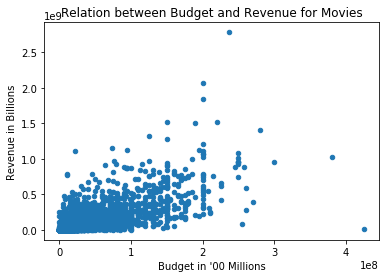

In [21]:
# Create scatter plot between Budget and Revenue
df_movies.plot(x = 'budget', y = 'revenue', kind = 'scatter');
plt.title("Relation between Budget and Revenue for Movies")
plt.xlabel("Budget in '00 Millions")
plt.ylabel("Revenue in Billions");

In [22]:
# Create a dataframe comprising of Budget and Revenue Columns
df_budget = df_movies.loc[:, 'budget':'revenue']
df_budget.corr() # Calculate correlation between budget and revenue

,budget,revenue
budget,1.00,0.69
revenue,0.69,1.00


**The above scatterplot and the correlation table shows a positive correlation between Budget and Revenue**

### 2. Do movies with more vote counts recieve higher ratings?

In [23]:
# Slice dataframe to get two columns: vote_count and vote_average
df_vote = df_movies.loc[:, 'vote_count': 'vote_average']

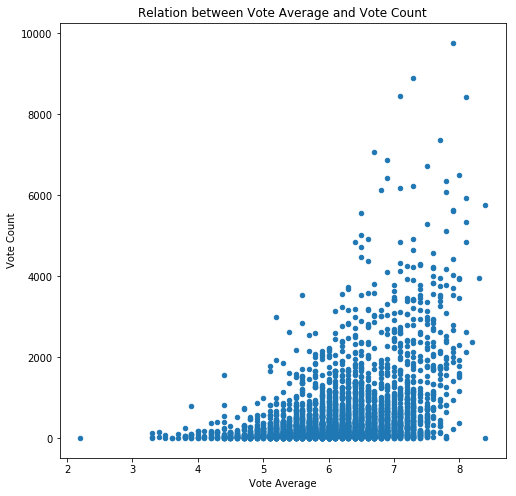

In [24]:
# Plot a scatter graph for vote_count and vote_average

df_vote.plot(x = 'vote_average', y = 'vote_count', kind = 'scatter', figsize = (8,8));
plt.title("Relation between Vote Average and Vote Count")
plt.xlabel("Vote Average")
plt.ylabel("Vote Count");

In [25]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.00,0.39
vote_average,0.39,1.00


**The above scatter plot and correlation table shows that there is a weak correlation between vote_count and vote_average**

### 3. How do the Popularity and Ratings(Average Vote) of Hit Movies compare to that of Flop Movies over the years?

> We first calculate the Popularity of Hit Movies to that of Flop Movies

In [26]:
# Identify movies that have generated a profit and are thus a hit
hit_movies = df_movies.query('budget < revenue')

In [27]:
# Create a table for hit movies grouped according to their release year and average popularity
hit_group = hit_movies.groupby('release_year')['popularity'].mean()
hit_group = hit_group.to_frame() # Convert the series object to dataframe
hit_group.head() # Check the table created

,popularity
release_year,
1960,1.32
1961,0.86
1962,0.98
1963,1.21
1964,1.38


In [28]:
# Identify movies that have generated a loss and are thus a flop
flopped_movies = df_movies.query('budget > revenue')

In [29]:
# Create a table for flop movies grouped according to their release year and average popularity
flop_group = flopped_movies.groupby('release_year')['popularity'].mean()
flop_group = flop_group.to_frame() # Convert the series object to dataframe
flop_group.head() # Check the table created

,popularity
release_year,
1961,0.17
1963,0.21
1965,0.15
1967,0.18
1968,0.05


In [30]:
# Merge the two datasets on the release_year column
hit_flop = pd.merge(hit_group, flop_group, on = 'release_year', left_index = False).reset_index()

In [31]:
hit_flop.rename({'popularity_x':'hit_movies', 'popularity_y':'flop_movies'}, axis = 1, inplace = True)
hit_flop.head()

,release_year,hit_movies,flop_movies
0,1961,0.86,0.17
1,1963,1.21,0.21
2,1965,1.28,0.15
3,1967,1.09,0.18
4,1968,1.02,0.05


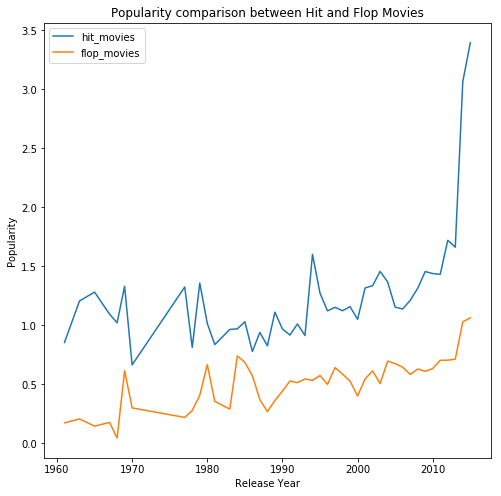

In [32]:
# Plot the graph showing the comparison of popularity between Hit and Flop Movies over the years
hit_flop.plot(x = 'release_year',figsize = (8,8))
plt.title("Popularity comparison between Hit and Flop Movies")
plt.xlabel("Release Year")
plt.ylabel("Popularity");

> **The above chart shows that the popularity of Hit Movies have greatly increased over the Flop Movies as we near the 2000's** 

**Does the relation between Vote Average and Movie Business have similar track record over the years? We find out next.**

In [33]:
# Create a table for hit movies grouped according to their release year and average vote
hit_vote = hit_movies.groupby('release_year')['vote_average'].mean()
hit_vote = hit_vote.to_frame() # Convert the series object to dataframe
hit_vote.head() # Check the table created

,vote_average
release_year,
1960,7.40
1961,6.68
1962,6.90
1963,7.00
1964,6.97


In [34]:
# Create a table for flop movies grouped according to their release year and average vote
flop_vote = flopped_movies.groupby('release_year')['vote_average'].mean()
flop_vote = flop_vote.to_frame() # Convert the series object to dataframe
flop_vote.head() # Check the table created

,vote_average
release_year,
1961,6.10
1963,5.60
1965,5.70
1967,5.25
1968,6.00


In [35]:
# Merge the two datasets on the release_year column
hit_flop_vote = pd.merge(hit_vote, flop_vote, on = 'release_year', left_index = False).reset_index()

In [36]:
# Rename the columns to more suitable labels
hit_flop_vote.rename({'vote_average_x':'vote_average_hit', 'vote_average_y':'vote_average_flop'}, axis = 1, inplace = True)
hit_flop_vote.head()

,release_year,vote_average_hit,vote_average_flop
0,1961,6.68,6.10
1,1963,7.00,5.60
2,1965,6.75,5.70
3,1967,6.93,5.25
4,1968,6.74,6.00


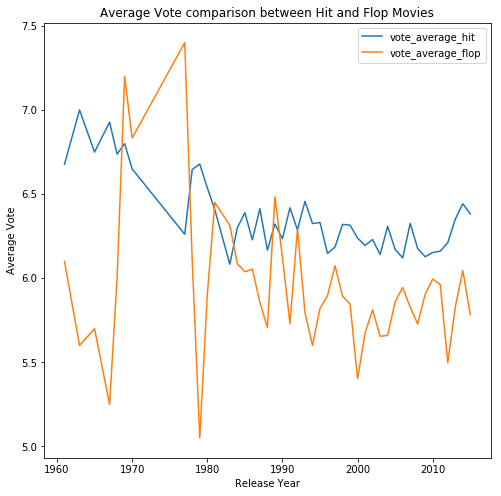

In [37]:
# Plot the graph showing the comparison of average vote between Hit and Flop Movies over the years
hit_flop_vote.plot(x = 'release_year',figsize = (8,8))
plt.title("Average Vote comparison between Hit and Flop Movies")
plt.xlabel("Release Year")
plt.ylabel("Average Vote");

**The above chart shows a few surprises:** 
- In the period between 1970 and 1980, flop movies were rated much higher than hit movies
- The difference in average ratings between the two is much lesser over the years

### 4. Which genres have become most recurrent over the years?

The above question can be answered by first creating the sum of all the genres that appear each time. Since there are multiple genres that each movie can have, the only way is to sum up all the genres that are named for each movie and then check which genres come up more often than others.

In [38]:
# Create a new dataframe with the sum of all genres
df_genres_sum =  df_genres.sum().sort_values(ascending = False)
df_genres_sum.head()

Drama        1729
Comedy       1335
Thriller     1194
Action       1076
Adventure     743
dtype: int64

**We then plot a bar graph that shows the count of all the genres with decreasing amount of appearance.**

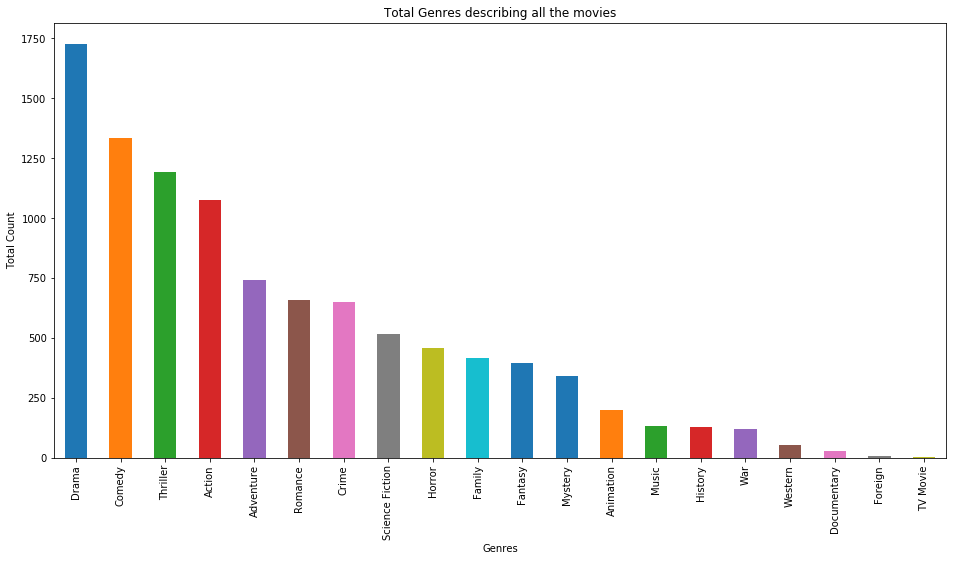

In [39]:
df_genres_sum.plot(kind = 'bar', figsize = (16, 8))
plt.title("Total Genres describing all the movies")
plt.xlabel("Genres")
plt.ylabel("Total Count");

From the above graph, we can see all the different genre types and their frequency in which they occur in the data

**Next, we group this data with the** ***release_year*** **column and analyse how have the genres progressed over the years**

In [40]:
# Join the genres data with release_year and create a new dataframe
df_gen_y = df_genres.join(df_movies.release_year, how = 'left')

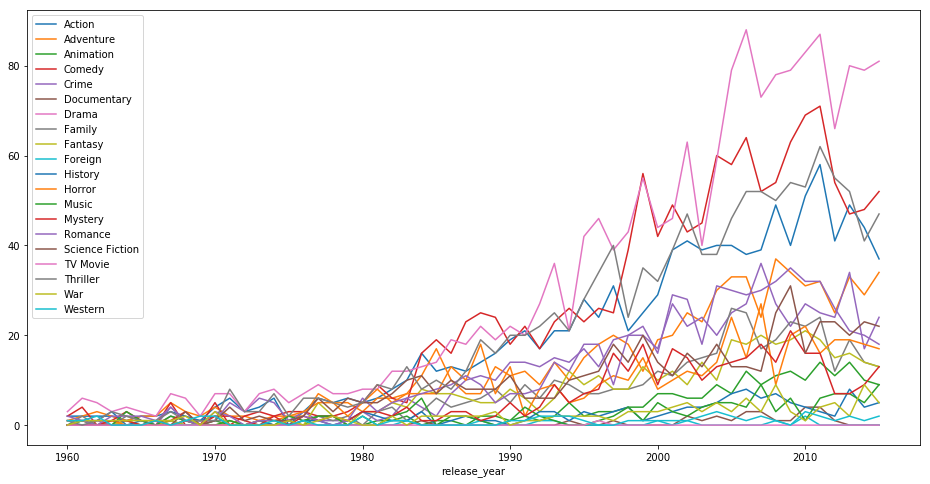

In [41]:
# Plot the graph for genres data over the years
df_gen_y.groupby('release_year', as_index = False).sum().plot(x = 'release_year', figsize = (16, 8));

The above chart shows that the popularity of ***Drama, Comedy, Thriller*** and ***Action*** have increased manyfold over the years.

<a id='conclusions'></a>
## Conclusions

- The first question **"Which are the top grossing movies and do higher budgets result in higher revenue for the movies?"** has shown that higher budgets do infact result in higher revenues. The author also found a strong correlation between Budget and Revenue of a Movie. 


- The second question **"Do movies with more vote counts recieve higher ratings?"** shows interesting result. The columns do not show a strong positive correlation. It maybe that as the movie gets more and more popular, it also recieves mixed reviews from the viewers. But it cannot be said with any certainty.


- The third question **"How do the Popularity and Ratings(Average Vote) of Hit Movies compare to that of Flop Movies over the years?"** shows interesting results. There is a huge gap in Popularity between Hit and Flop Movies over the years. However, The same cannot be said about average vote. In the decade of 70's, the ratings of Flop movies are higher than that of Hit movies and the Gap between them over the years is not that big. 


- The forth question **"Which genres have become most recurrent over the years?"** indicate that Genres of Drama, Comedy, Action and Thriller have become increasingly recurrent over the years.

**All results are limited to the underlying data set and no advaned statistics were performed. One of the major limitations that has to be taken into consideration is that many entries in the dataset have been removed due to missing data. Thus, the results can only be treated as indicators and are not generalizable.**



In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0